# Ensemble learning with iris and bima datasets
<br>

## Part I
<br>
### Problem 1: Using three different individual learners to classify iris data and compute the accuracy of corresponding learners.

In [2]:
#loading iris datasets and importing individual learners
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import datasets
#import logistic classifier
from sklearn.linear_model import LogisticRegression
#import decision tree classifier
from sklearn.tree import DecisionTreeClassifier
#import K-nearest neighbour
from sklearn.neighbors import KNeighborsClassifier

In [124]:
#prepare datasets
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state =0)

In [125]:
#find the score obtained by using logistic regression 
LR = LogisticRegression().fit(X_train, y_train)
LR_score = LR.score(X_test,y_test)
print(LR_score)

0.6


In [126]:
#find the score obtained by using KNN 
KNN = KNeighborsClassifier().fit(X_train, y_train)
KNN_score = KNN.score(X_test, y_test)
print(KNN_score)

0.666666666667


In [127]:
#find the score obtained by using decision tree 
CART = DecisionTreeClassifier().fit(X_train, y_train)
CART_score = CART.score(X_test, y_test)
print(CART_score)

0.666666666667


### Problem 2: Using VotingClassifier to combine all individual learners to be an ensemble learner.


In [7]:
from sklearn.ensemble import VotingClassifier

In [128]:
#using voting = 'hard'
ensemble_learner = VotingClassifier(estimators=[('LR', LogisticRegression()), ('KNN', KNeighborsClassifier() ), 
                                     ('CART', DecisionTreeClassifier())], voting='hard')
ensemble_result = ensemble_learner.fit(X_train, y_train)
ensemble_learner_score = ensemble_learner.score(X_test, y_test)
print(ensemble_learner_score)

0.6


In [129]:
#using voting = 'soft'
ensemble_learner = VotingClassifier(estimators=[('LR', LogisticRegression()), ('KNN', KNeighborsClassifier() ), 
                                     ('CART', DecisionTreeClassifier())], voting='soft')
ensemble_result = ensemble_learner.fit(X_train, y_train)
ensemble_learner_score = ensemble_learner.score(X_test, y_test)
print(ensemble_learner_score)
#If ‘hard’, uses predicted class labels for majority rule voting. Else if ‘soft’, predicts the class label based on the argmax of the sums of the predicted probabilities,
#which is recommended for an ensemble of well-calibrated classifiers. In our case, using soft gave us better predictions.

0.6


## Part II Random Forest Classifier
<br>
### Problem 1: implementation of random forest classifier with iris datasets.

In [130]:
#import random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [132]:
#First we try to use all default parameters
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [133]:
RF_score = RF.score(X_test, y_test)
print(RF_score)

0.633333333333


Now, let's play with some parameters, and compare the results with the default setting.

In [134]:
#bootstrap : boolean, optional (default=True)

RF_bootstrap_false = RandomForestClassifier(bootstrap = False)
RF_bootstrap_false.fit(X_train, y_train)
RF_bootstrap_false_score = RF_bootstrap_false.score(X_test, y_test)
print(RF_bootstrap_false_score)

0.666666666667


In [135]:
#criterion : string, optional (default=”gini”)
RF_cri_entropy = RandomForestClassifier(criterion = "entropy")
RF_cri_entropy.fit(X_train, y_train)
RF_cri_entropy_score = RF_cri_entropy.score(X_test, y_test)
print(RF_cri_entropy_score)

0.566666666667


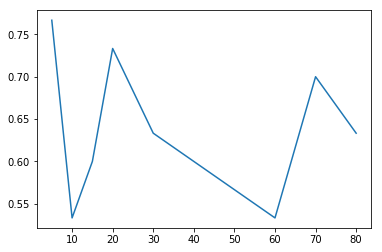

In [138]:
#max_depth : integer or None, optional (default=None)
#The maximum depth of the tree. If None, then nodes are expanded until all
#leaves are pure or until all leaves contain less than min_samples_split samples.
#max_depth = 10
max_depth = [5, 10, 15, 20, 30, 40, 50, 60, 70, 80]
RF_max_depth_scores = []
for i in range(len(RF_max_depth)):
    RF_max_depth = RandomForestClassifier(max_depth = max_depth[i]).fit(X_train, y_train)
    RF_max_depth_scores.append(RF_max_depth.score(X_test, y_test))
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(max_depth,RF_max_depth_scores)
plt.show()
#RF_max_depth_10 = RandomForestClassifier(max_depth = 10).fit(X,Y)
#RF_max_depth_10_score = RF_max_depth_10.score(X,Y)
#print(RF_max_depth_10_score)

`max_leaf_nodes` : int or None, optional (default=None)

Grow trees with `max_leaf_nodes` in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

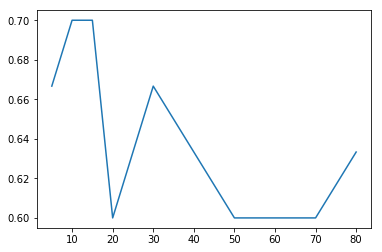

In [140]:
max_leaf_nodes = [5, 10, 15, 20, 30, 40, 50, 60, 70, 80]
RF_max_leaf_nodes_scores = []
for i in range(len(max_leaf_nodes)):
    RF_max_leaf_nodes = RandomForestClassifier(max_leaf_nodes = max_leaf_nodes[i]).fit(X_train, y_train)
    RF_max_leaf_nodes_scores.append(RF_max_leaf_nodes.score(X_test, y_test))
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(max_leaf_nodes,RF_max_leaf_nodes_scores)
plt.show()

`max_features` : int, float, string or None, optional (default=”auto”)

The number of features to consider when looking for the best split:

- If `int`, then consider max_features features at each split.
- If `float`, then max_features is a percentage and `int(max_features * n_features)` features are considered at each split.
- If `“auto”`, then max_features=sqrt(n_features).
- If `“sqrt”`, then max_features=sqrt(n_features) (same as `“auto”`).
- If `“log2”`, then max_features=log2(n_features).
- If `None`, then max_features=n_features.

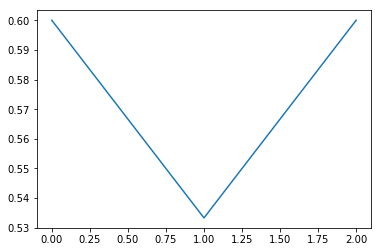

In [157]:
#max_features = sqrt
max_feat = ["auto","sqrt","log2"]
RF_max_feat_scores = []
for n in range(len(max_feat)):
    RF_max_feat = RandomForestClassifier(max_features = max_feat[n]).fit(X_train, y_train)
    RF_max_feat_scores.append(RF_max_feat.score(X_test, y_test))
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot([0, 1, 2],RF_max_feat_scores)
plt.show()

`min_samples_leaf` : int, float, optional (default=1)

The minimum number of samples required to be at a leaf node:

If int, then consider `min_samples_leaf` as the minimum number.
If float, then `min_samples_leaf` is a percentage and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node.

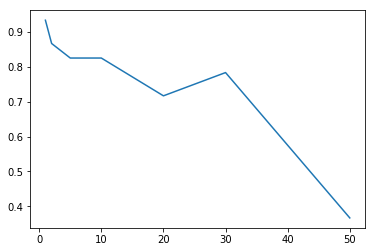

In [142]:
min_leaf = [1, 2 ,5, 10, 20, 30, 50]
RF_min_leaf_nodes_scores = []
for i in range(len(min_leaf)):
    RF_min_leaf_nodes = RandomForestClassifier(min_samples_leaf = min_leaf[i]).fit(X_train, y_train)
    RF_min_leaf_nodes_scores.append(RF_min_leaf_nodes.score(X_train, y_train))
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(min_leaf,RF_min_leaf_nodes_scores)
plt.show()

n_estimators : integer, optional (default=10)

The number of trees in the forest.

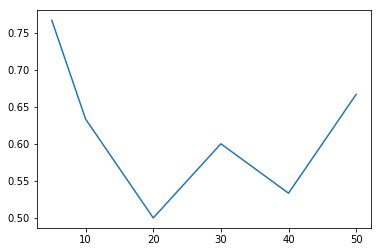

In [143]:
estimators = [5, 10 ,20, 30, 40, 50]
RF_n_estimators_scores = []
for n in range(len(estimators)):
    RF_n_estimators = RandomForestClassifier(n_estimators = estimators[n]).fit(X_train, y_train)
    RF_n_estimators_scores.append(RF_n_estimators.score(X_test, y_test))
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(estimators,RF_n_estimators_scores)
plt.show()

### Problem 2 : How to tune the parameters for random forests to get higher accuracy? <br>
There are primarily 3 features which can be tuned to improve the predictive power of the model :
 - `max_features`: Increasing max_features generally improves the performance of the model as at each node now we have a higher number of options to be considered. However, this is not necessarily true as this decreases the diversity of individual tree which is the USP of random forest. But, for sure, you decrease the speed of algorithm by increasing the max_features. Hence, you need to strike the right balance and choose the optimal `max_features`.
 
 - `n_estimators` : This is the number of trees you want to build before taking the maximum voting or averages of predictions. Higher number of trees give you better performance but makes your code slower. You should choose as high value as your processor can handle because this makes your predictions stronger and more stable.
 - `min_sample_leaf` : If you have built a decision tree before, you can appreciate the importance of minimum sample leaf size. Leaf is the end node of a decision tree. A smaller leaf makes the model more prone to capturing noise in train data. Generally I prefer a minimum leaf size of more than 50. However, you should try multiple leaf sizes to find the most optimum for your use case.

 


## Part III Adaboost and GBM with Bima datasets.
<br>
### Problem 1 : Import Bima Indian diabetes dataset and implementation of AdaBoost

In [144]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
bima = pd.read_csv("Bima_indian_diabetes.csv")
bima.shape

(768, 9)

In [93]:
bima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [97]:
# Split into Input and Output.
attributes = list(bima.columns[:8])
X = bima[attributes].values 
y= bima['Outcome'].values

In [98]:
#Split train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state =0)

In [145]:
bima_adaboost = AdaBoostClassifier().fit(X_train,y_train)

In [146]:
bima_adaboost.score(X_test,y_test)

0.66666666666666663

Tune the parameters:
<br>
`n_estimators` : integer, optional (default=50)

The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early.

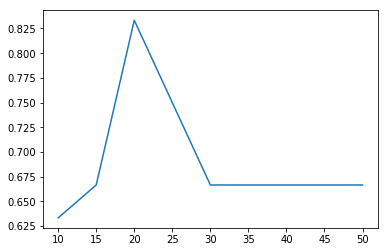

In [148]:
estimators = [10, 15, 20, 30, 40, 50]
Ada_n_estimators_scores = []
for n in range(len(estimators)):
    Ada_n_estimators =AdaBoostClassifier(n_estimators = estimators[n]).fit(X_train,y_train)
    Ada_n_estimators_scores.append(Ada_n_estimators.score(X_test,y_test))
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(estimators,Ada_n_estimators_scores)
plt.show()

In [120]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier

`learning_rate` : float, optional (default=1.)

Learning rate shrinks the contribution of each classifier by `learning_rate`. There is a trade-off between `learning_rate` and `n_estimators`.

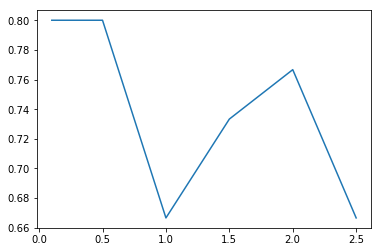

In [149]:
lr = [0.1, 0.5, 1, 1.5, 2, 2.5]
Ada_lr_scores = []
for n in range(len(lr)):
    Ada_lr =AdaBoostClassifier(learning_rate = lr[n]).fit(X_train,y_train)
    Ada_lr_scores.append(Ada_lr.score(X_test,y_test))
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(lr,Ada_lr_scores)
plt.show()

### Problem 2: The implemenation of gradient boosting decision tree algorithm.

In [158]:
from sklearn.ensemble import GradientBoostingClassifier

In [153]:
bima_gdbt = GradientBoostingClassifier().fit(X_train, y_train)

In [155]:
bima_gdbt.score(X_test, y_test)

0.66666666666666663